# The classifier

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from timeit import default_timer as timer
from matplotlib.colors import ListedColormap
from scipy.stats import mode

class NNb:
    def __init__(self, X, c):
        self.n, self.N = X.shape
        self.X = X
        self.c = c
        
    def classify(self, x, k):
        # increase dimension so there is no need for explicit loops
        Xd = np.broadcast_to(self.X, (x.shape[0], self.X.shape[0], self.X.shape[1]))
        xd = x[:,np.newaxis,:]
        dsq = np.sum(np.square(Xd - xd), axis=2)
        minindices = np.argpartition(dsq, k)[:,:k]
        return mode(self.c[minindices], axis=1)[0].transpose()[0]
    
    def visualize(self, k):
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
        
        x_min, x_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
        h = (x_max - x_min) / 256
        y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = self.classify(np.c_[xx.ravel(), yy.ravel()], k)

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.c, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("Class classification (k = %i)"   % (k))
        plt.axis('equal');
        plt.show()

## XOR dataset

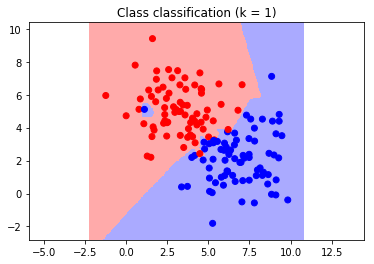

Elapsed time: 0.0008211370004573837
[[ 26.   1.]
 [  1.  22.]]
---------------


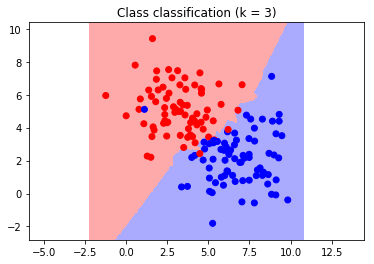

Elapsed time: 0.0023328019997279625
[[ 26.   1.]
 [  2.  21.]]
---------------


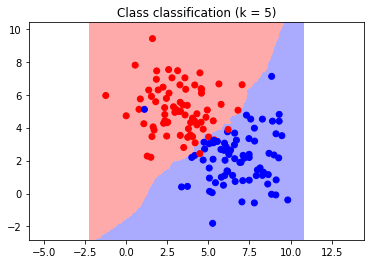

Elapsed time: 0.0006804980002925731
[[ 26.   1.]
 [  0.  23.]]
---------------


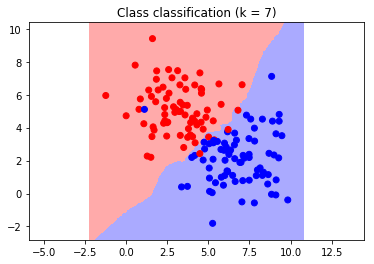

Elapsed time: 0.0007244790031109005
[[ 26.   1.]
 [  1.  22.]]
---------------


In [128]:
x1 = 1.5*np.random.randn(100)+3
y1 = 1.5*np.random.randn(100)+5
x2 = 1.5*np.random.randn(100)+7
y2 = 1.5*np.random.randn(100)+2
X = np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T # the data matrix (every row a feature vector)
c = 1.0*np.hstack((np.zeros(100), np.ones(100)))

ind = np.arange(len(X))
ind = np.random.permutation(ind)
cutoff = int(len(X) * 0.75)
L = ind[0:cutoff]
T = ind[cutoff:]

# Learning Set
nnc = NNb(X[L], c[L])

for k in np.arange(1, 8, 2):
    nnc.visualize(k)
    
    # Classification of Test Set
    start = timer()
    test = nnc.classify(X[T,:], k)
    end = timer()
    print('Elapsed time: ' + str(end - start))

    # Confusion Matrix
    CM = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            CM[i,j] = sum(np.logical_and(c[T]==i, test==j))
    print(CM)
    print('---------------')

## Iris dataset

In [125]:
def cnvt(s):
    tab = {b'Iris-setosa': 1.0, b'Iris-versicolor': 2.0, b'Iris-virginica': 3.0}
    if s in tab:
        return tab[s]
    else:
        return -1.0
    
XC = pylab.loadtxt('data/iris.data', delimiter=',', dtype=float, converters={4: cnvt})
X = XC[:,:-1]
c = XC[:,-1]

ind = np.arange(len(X))
ind = np.random.permutation(ind)
cutoff = int(len(X) * 0.75)
L = ind[0:cutoff]
T = ind[cutoff:]

# Learning Set
nnc = NNb(X[L], c[L])

for k in np.arange(1, 8, 2):
    print('k = ' + str(k))
    # Classification of Test Set
    start = timer()
    test = nnc.classify(X[T,:], k)
    end = timer()
    print('Elapsed time: ' + str(end - start))
    
    # Confusion Matrix
    CM = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            CM[i,j] = sum(np.logical_and(c[T]==(i + 1), test==(j + 1)))
    print(CM)
    print('---------------')

k = 1
Elapsed time: 0.0006724280010530492
[[ 13.   0.]
 [  0.  12.]]
---------------
k = 3
Elapsed time: 0.0008147720000124536
[[ 13.   0.]
 [  0.  12.]]
---------------
k = 5
Elapsed time: 0.0006259239999053534
[[ 13.   0.]
 [  0.  12.]]
---------------
k = 7
Elapsed time: 0.0007140739999158541
[[ 13.   0.]
 [  0.  12.]]
---------------
